# **Analisis Ketimpangan Pembangunan Antar Kabupaten/Kota di Provinsi Sulawesi Tenggara Menggunakan Pendekatan Multidimensional Berbasis Indikator SDGs 10**

Kelompok 1
1. Muhammad Aksal Prasdion Aditya (F1G123023)
2. Della Mustifar (F1G123043)
3. Almunajat Amirul Soleh (F1G123017)


**Original file is located at**
    (isi dengan link colab kalian nanti)

# **Menentukan Pertanyaan Bisnis atau Analisis**

1. Bagaimana tingkat ketimpangan pembangunan antar kabupaten/kota di Provinsi Sulawesi Tenggara berdasarkan indikator multidimensional seperti kemiskinan, pendidikan, demografi, dan ekonomi?

2. Bagaimana pengaruh akses layanan publik (listrik, sanitasi, internet) terhadap tingkat kesejahteraan sosial ekonomi di masing-masing kabupaten/kota?

3. Bagaimana hubungan tingkat kemiskinan, pengeluaran per kapita, dan PDRB per kapita terhadap variasi pembangunan wilayah di Sulawesi Tenggara?

4. Bagaimana disparitas pendidikan (IPM laki-laki dan perempuan, rata-rata lama sekolah, rasio guru–murid) mempengaruhi ketimpangan pembangunan antar kabupaten/kota?

5. Bagaimana pola pengelompokan (clustering) kabupaten/kota berdasarkan indikator SDGs 10 menggunakan pendekatan Data Science?


### **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import difflib
import joblib
from google.colab import drive
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

print("Library berhasil dimuat! Siap lanjut ke Step Berikutnya.")

Library berhasil dimuat! Siap lanjut ke Step Berikutnya.


### **Gathering Data**


Pada tahap ini, kami mengumpulkan seluruh dataset yang dibutuhkan dari folder Google Drive.
Dataset terdiri dari 6 file utama:

1. Akses Pelayanan Publik.csv
2. kemiskinan.csv
3. Pendidikan.csv
4. Ekonomi & Tenaga Kerja.csv
5. demografi.csv
6. Ketimpangan Pengeluaran.csv

Semua dataset berada di folder:
    /content/drive/MyDrive/project data science/dataset/


In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Path ke folder dataset
path = "/content/drive/MyDrive/project_data_science/dataset/"

# Membaca dataset
akses = pd.read_csv(path + "Akses_Pelayanan_Publik.csv")
kemiskinan = pd.read_csv(path + "kemiskinan.csv")
pendidikan = pd.read_csv(path + "Pendidikan.csv")
ekonomi = pd.read_csv(path + "Ekonomi_&_Tenaga_Kerja.csv")
demografi = pd.read_csv(path + "demografi.csv")
pengeluaran = pd.read_csv(path + "Ketimpangan_Pengeluaran.csv")

print("Semua dataset berhasil dibaca!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Semua dataset berhasil dibaca!


In [3]:
akses.head()

,Kabupaten/Kota,Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen),Rasio Elektrifikas,Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)
0,Buton,80.33,99.59,55.14
1,Muna,85.31,99.07,54.47
2,Konawe,90.50,99.65,62.38
3,Kolaka,93.56,99.93,66.79
4,Konawe Selatan,92.36,99.90,63.95


In [4]:
kemiskinan.head()

,Kabupaten/Kota,Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah),Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa),Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)
0,Buton,302183,14.15,13.77
1,Muna,419071,32.24,14.07
2,Konawe,400581,33.09,13.02
3,Kolaka,464000,32.96,11.80
4,Konawe Selatan,331620,36.84,11.26


In [5]:
pendidikan.head()

,Kabupaten/Kota,Jumlah Sekolah (SMA) Kabupaten/Kota di SUlawesi Tenggara,Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa),Rata-rata Lama Sekolah (Tahun),Indeks Pembangunan Manusia (IPM) Laki-laki,Indeks Pembangunan Manusia (IPM) Perempuan
0,Buton,23,5524,8.49,75.99,62.22
1,Muna,35,9402,8.53,75.98,66.84
2,Konawe,28,8891,9.56,77.80,72.85
3,Kolaka,15,6046,9.35,79.57,71.93
4,Konawe Selatan,29,9874,8.51,74.86,66.30


In [6]:
ekonomi.head()

,Kabupaten/Kota,PDRB Per Kapita Atas Dasar Harga Konstan 2010 (Juta Rupiah),PDRB Atas Dasar Harga Berlaku (juta Rupiah),PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah),Tingkat Pengangguran Terbuka (TPT) Menurut Kabupaten/Kota (Persen)
0,Buton,25.80,5062656.23,3101735.07,2.48
1,Muna,25.15,8813691.13,5650868.84,3.27
2,Konawe,41.72,18295409.02,11244655.64,3.09
3,Kolaka,83.03,35684210.97,20418779.35,3.36
4,Konawe Selatan,29.74,16452468.51,9630029.61,3.12


In [7]:
demografi.head()

,Kabupaten/Kota,Jumlah Penduduk (Ribu),Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (Km2),Rasio Jenis Kelamin Penduduk
0,Buton,120.2,1.56,4.37,72,102.1
1,Muna,224.7,1.53,8.17,121,97.0
2,Konawe,269.5,1.74,9.80,50,107.0
3,Kolaka,245.9,1.26,8.95,83,104.3
4,Konawe Selatan,323.8,1.77,11.78,76,105.0


In [8]:
pengeluaran.head()

,Kabupaten/Kota,Rata-Rata Pengeluaran per Kapita Sebulan menurut Kabupaten/Kota (Rupiah),Indeks Kedalaman Kemiskinan Menurut Kabupaten/Kota,Indeks Keparahan Kemiskinan Menurut Kabupaten/Kota
0,Buton,793172,1.93,0.37
1,Muna,786420,2.21,0.50
2,Konawe,1264259,2.35,0.60
3,Kolaka,1245515,1.95,0.50
4,Konawe Selatan,1096657,2.20,0.55


# **Insight**

1. **Kesenjangan IPM Gender**
   Rata-rata lama sekolah relatif merata, namun kesenjangan IPM gender masih tinggi. Kabupaten Buton memiliki selisih terbesar antara laki-laki dan perempuan, menunjukkan perlunya peningkatan pembangunan manusia khususnya bagi perempuan.

2. **Disparitas Ekonomi Antar Wilayah**
   Perbedaan ekonomi sangat mencolok. Kolaka memiliki PDRB per kapita tertinggi, lebih dari tiga kali lipat Muna dan Buton, menandakan pemusatan aktivitas ekonomi pada wilayah tertentu.

3. **Ketimpangan Infrastruktur Digital**
   Elektrifikasi sudah hampir merata, namun akses internet masih timpang. Kolaka memiliki akses tertinggi, sementara Buton dan Muna tertinggal, berpotensi menghambat peluang digital di wilayah kepulauan.

4. **Perbedaan Beban Biaya Hidup**
   Garis kemiskinan berbeda signifikan antar kabupaten. Kolaka dan Muna memiliki garis kemiskinan lebih tinggi dibandingkan Buton, mengindikasikan penduduk miskin di wilayah tersebut menghadapi biaya hidup yang lebih berat.


## **Data Wrangling (Assessment & Standardisasi)**


Tahap ini mencakup:
- Melihat struktur setiap dataset
- Memastikan tidak ada missing value kritis
- Menyamakan nama kabupaten/kota agar bisa digabung (merge)
- Membersihkan format teks dan angka jika diperlukan


### Melihat informasi tiap dataset

In [9]:

print("\n=== INFO Akses Pelayanan Publik ===")
print(akses.info())

print("\n=== INFO Kemiskinan ===")
print(kemiskinan.info())

print("\n=== INFO Pendidikan ===")
print(pendidikan.info())

print("\n=== INFO Ekonomi & Tenaga Kerja ===")
print(ekonomi.info())

print("\n=== INFO Demografi ===")
print(demografi.info())

print("\n=== INFO Ketimpangan Pengeluaran ===")
print(pengeluaran.info())




=== INFO Akses Pelayanan Publik ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                             --------------  -----  
 0   Kabupaten/Kota                                                                                                                     17 non-null     object 
 1   Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen)  17 non-null     float64
 2   Rasio Elektrifikas                                                                                                                 17 non-null     float64
 3   Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah 

### Mengecek missing value

In [10]:

print("\n=== Missing Value di Akses Pelayanan Publik ===")
print(akses.isnull().sum())

print("\n=== Missing Value di Kemiskinan ===")
print(kemiskinan.isnull().sum())

print("\n=== Missing Value di Pendidikan ===")
print(pendidikan.isnull().sum())

print("\n=== Missing Value di Ekonomi & Tenaga Kerja ===")
print(ekonomi.isnull().sum())

print("\n=== Missing Value di Demografi ===")
print(demografi.isnull().sum())

print("\n=== Missing Value di Ketimpangan Pengeluaran ===")
print(pengeluaran.isnull().sum())


=== Missing Value di Akses Pelayanan Publik ===
Kabupaten/Kota                                                                                                                       0
Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen)    0
Rasio Elektrifikas                                                                                                                   0
Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)    0
dtype: int64

=== Missing Value di Kemiskinan ===
Kabupaten/Kota                                                0
Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah)         0
Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa)     0
Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)    0
dtype: int64

=== Missing Value di Pendidikan ===
Kabupaten/Kota                                         

### Cek Duplicate Data

In [11]:
print("\n Duplikasi di Akses Pelayanan Publik =",akses.duplicated().sum())
print("\n Duplikasi di Kemiskinan =", kemiskinan.duplicated().sum())
print("\n Duplikasi di Pendidikan =",pendidikan.duplicated().sum())
print("\n Duplikasi di Ekonomi & Tenaga Kerja =",ekonomi.duplicated().sum())
print("\n Duplikasi di Demografi =",demografi.duplicated().sum())
print("\n Duplikasi di Ketimpangan Pengeluaran =",pengeluaran.duplicated().sum())


 Duplikasi di Akses Pelayanan Publik = 0

 Duplikasi di Kemiskinan = 0

 Duplikasi di Pendidikan = 0

 Duplikasi di Ekonomi & Tenaga Kerja = 0

 Duplikasi di Demografi = 0

 Duplikasi di Ketimpangan Pengeluaran = 0


### Statistik Descriptif

In [12]:
akses.describe()

,Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen),Rasio Elektrifikas,Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)
count,17.000000,17.000000,17.000000
mean,85.840588,99.667059,62.901765
std,7.957126,0.381785,9.528293
min,71.640000,98.670000,51.730000
25%,82.740000,99.570000,55.140000
50%,85.490000,99.740000,62.250000
75%,92.890000,99.990000,66.790000
max,96.990000,100.000000,85.610000


In [13]:
print("\n=== statistik deskripsi Kemiskinan ===")
kemiskinan.describe()




=== statistik deskripsi Kemiskinan ===


,Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah),Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa),Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)
count,17.000000,17.000000,17.000000
mean,399459.588235,18.915882,12.755882
std,71743.344422,9.595982,2.910161
min,290203.000000,5.440000,4.590000
25%,340151.000000,11.880000,11.800000
50%,403834.000000,15.350000,13.770000
75%,419071.000000,21.790000,14.070000
max,517092.000000,36.840000,15.900000


In [14]:
print("\n=== statistik deskripsi Kemiskinan ===")
pendidikan.describe()




=== statistik deskripsi Kemiskinan ===


,Jumlah Sekolah (SMA) Kabupaten/Kota di SUlawesi Tenggara,Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa),Rata-rata Lama Sekolah (Tahun),Indeks Pembangunan Manusia (IPM) Laki-laki,Indeks Pembangunan Manusia (IPM) Perempuan
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,18.411765,5541.294118,8.988235,75.724706,67.515882
std,8.411739,2910.408514,1.266191,4.417055,6.661653
min,6.000000,1518.000000,7.340000,69.860000,54.830000
25%,12.000000,3315.000000,8.400000,72.770000,63.150000
50%,16.000000,4569.000000,8.530000,74.860000,66.840000
75%,26.000000,6046.000000,9.450000,76.480000,70.800000
max,35.000000,12115.000000,12.530000,87.640000,83.940000


In [15]:
print("\n=== statistik deskripsi Kemiskinan ===")
ekonomi.describe()




=== statistik deskripsi Kemiskinan ===


,PDRB Per Kapita Atas Dasar Harga Konstan 2010 (Juta Rupiah),PDRB Atas Dasar Harga Berlaku (juta Rupiah),PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah),Tingkat Pengangguran Terbuka (TPT) Menurut Kabupaten/Kota (Persen)
count,17.000000,1.700000e+01,1.700000e+01,17.000000
mean,36.191765,1.037063e+07,6.399042e+06,2.841765
std,15.673281,9.453357e+06,5.690876e+06,1.022174
min,15.840000,1.717400e+06,1.136610e+06,1.160000
25%,25.800000,4.049256e+06,2.520464e+06,2.220000
50%,30.260000,5.768101e+06,3.638878e+06,2.730000
75%,44.840000,1.152184e+07,7.449386e+06,3.270000
max,83.030000,3.568421e+07,2.041878e+07,5.180000


In [16]:
print("\n=== statistik deskripsi Kemiskinan ===")
demografi.describe()




=== statistik deskripsi Kemiskinan ===


,Jumlah Penduduk (Ribu),Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (Km2),Rasio Jenis Kelamin Penduduk
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,161.717647,1.697059,5.882941,193.000000,102.600000
std,92.813188,0.282019,3.376177,330.229087,2.723279
min,39.000000,1.240000,1.420000,17.000000,97.000000
25%,99.600000,1.530000,3.620000,50.000000,100.800000
50%,125.800000,1.630000,4.580000,76.000000,102.400000
75%,224.700000,1.880000,8.170000,143.000000,104.400000
max,364.200000,2.300000,13.250000,1370.000000,107.000000


In [17]:
print("\n=== statistik deskripsi Kemiskinan ===")
pengeluaran.describe()




=== statistik deskripsi Kemiskinan ===


,Rata-Rata Pengeluaran per Kapita Sebulan menurut Kabupaten/Kota (Rupiah),Indeks Kedalaman Kemiskinan Menurut Kabupaten/Kota,Indeks Keparahan Kemiskinan Menurut Kabupaten/Kota
count,1.700000e+01,17.000000,17.000000
mean,1.097092e+06,2.154706,0.548824
std,2.889648e+05,0.662600,0.244563
min,7.457550e+05,0.640000,0.130000
25%,8.046730e+05,1.930000,0.380000
50%,1.105237e+06,2.130000,0.500000
75%,1.245515e+06,2.470000,0.630000
max,1.686521e+06,3.640000,1.220000


# **Pengecekan Outlier**

Tahap ini bertujuan untuk mengidentifikasi apakah terdapat outlier pada variabel numerik.
Metode yang digunakan:
1. Boxplot visual (melihat distribusi data)
2. Perhitungan statistik IQR (Interquartile Range)

Outlier penting karena dapat memengaruhi proses analisis, standarisasi data,
PCA, maupun clustering di tahap berikutnya.







In [18]:
# Menggabungkan sementara dataset agar bisa dianalisis bersama

df_list = [akses, kemiskinan, pendidikan, ekonomi, demografi, pengeluaran]
combined_df = akses.merge(kemiskinan, on="Kabupaten/Kota") \
                   .merge(pendidikan, on="Kabupaten/Kota") \
                   .merge(ekonomi, on="Kabupaten/Kota") \
                   .merge(demografi, on="Kabupaten/Kota") \
                   .merge(pengeluaran, on="Kabupaten/Kota")

In [19]:
# Menyeleksi kolom numerik saja
num_cols = combined_df.select_dtypes(include=np.number).columns

print("Jumlah variabel numerik:", len(num_cols))
print("Daftar variabel numerik:")
num_cols

Jumlah variabel numerik: 23
Daftar variabel numerik:


Index(['Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen)',
       'Rasio Elektrifikas',
       'Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)',
       'Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah)',
       'Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa)',
       'Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)',
       'Jumlah Sekolah (SMA) Kabupaten/Kota di SUlawesi Tenggara',
       'Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa)',
       'Rata-rata Lama Sekolah (Tahun)',
       'Indeks Pembangunan Manusia (IPM) Laki-laki',
       'Indeks Pembangunan Manusia (IPM) Perempuan',
       'PDRB Per Kapita  Atas Dasar Harga Konstan 2010 (Juta Rupiah)',
       'PDRB Atas Dasar Harga Berlaku (juta Rupiah)',
       'PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah)',
       'T

<Figure size 1200x600 with 0 Axes>

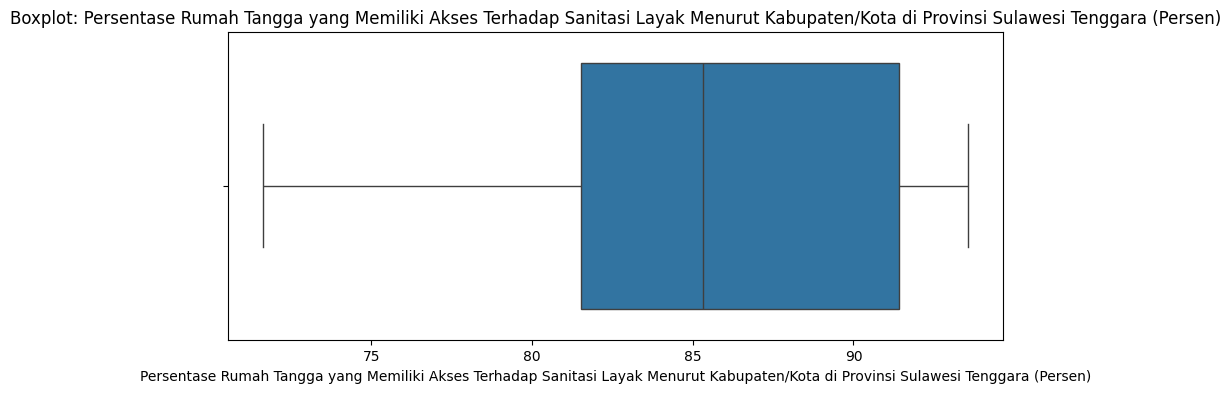

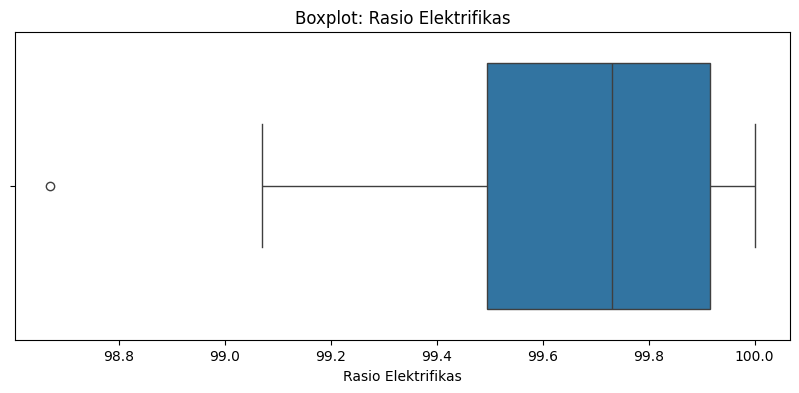

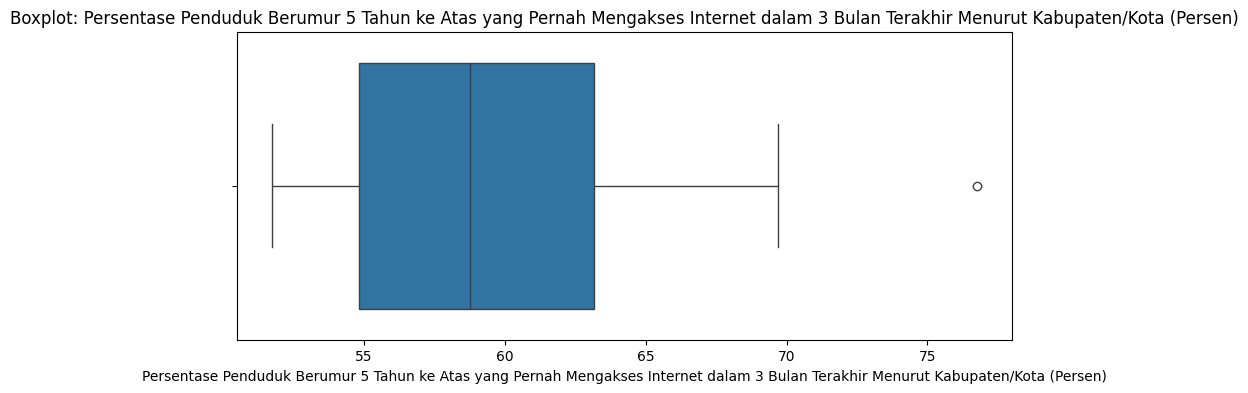

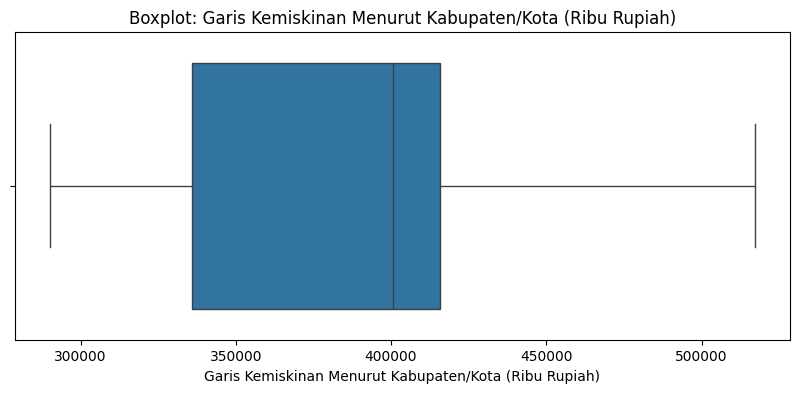

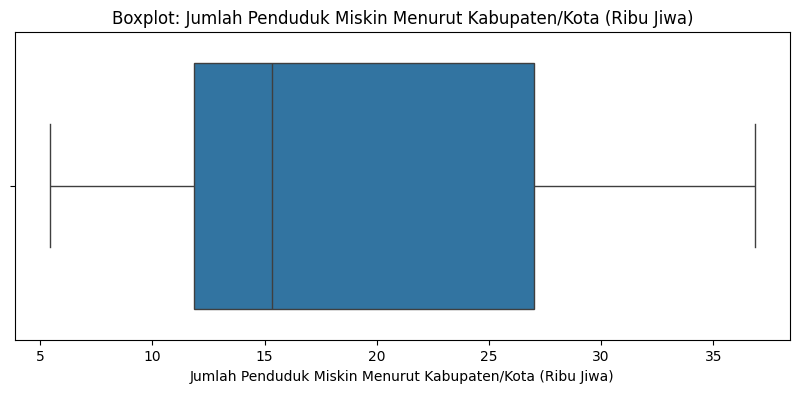

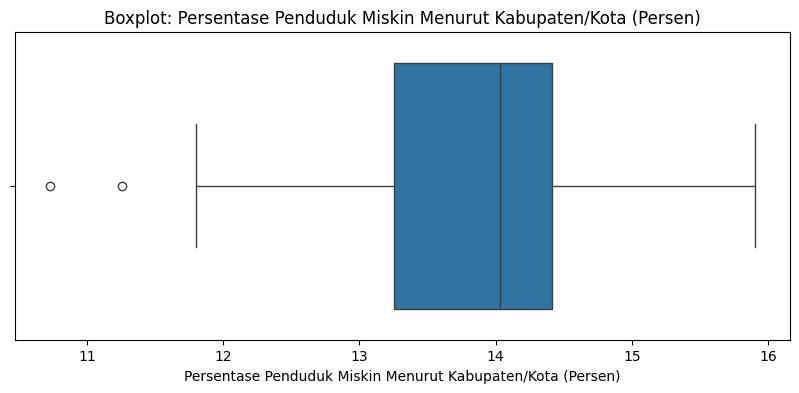

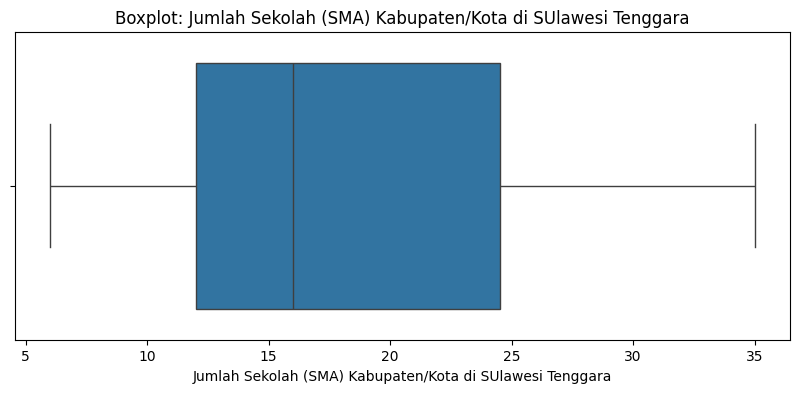

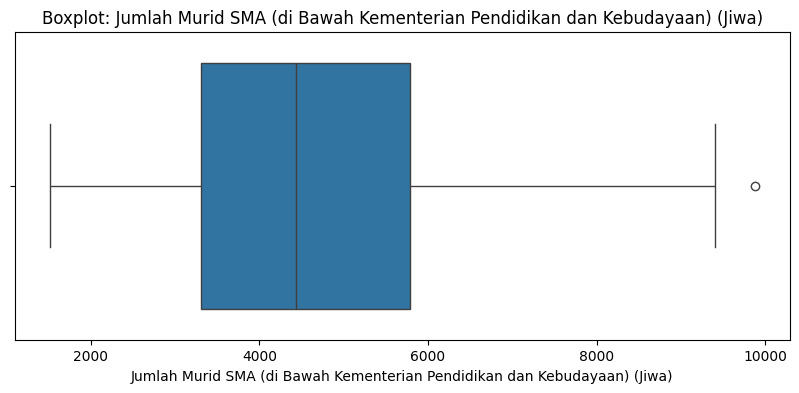

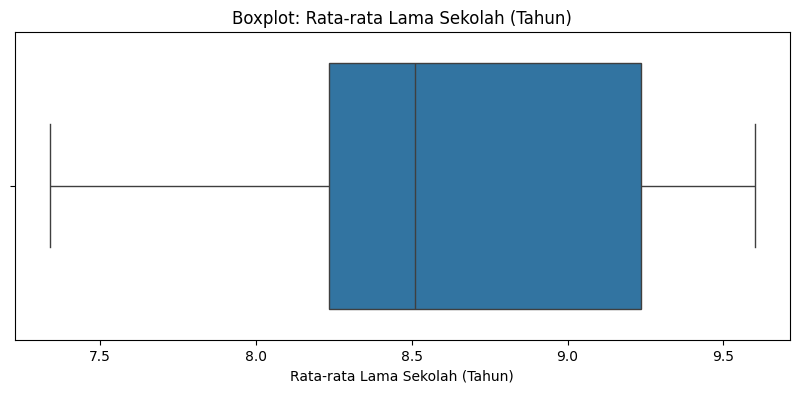

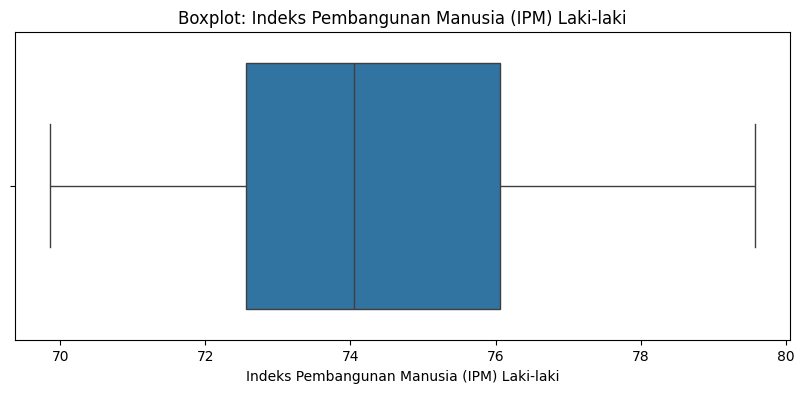

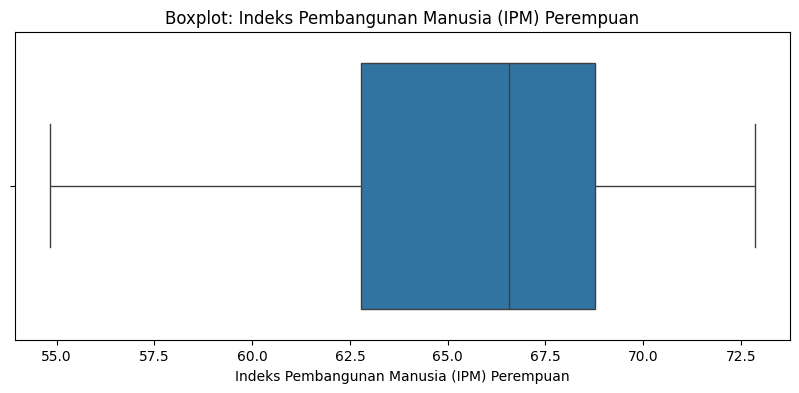

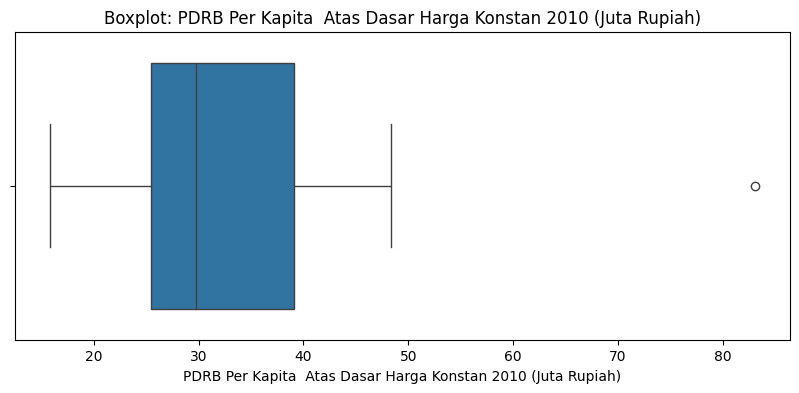

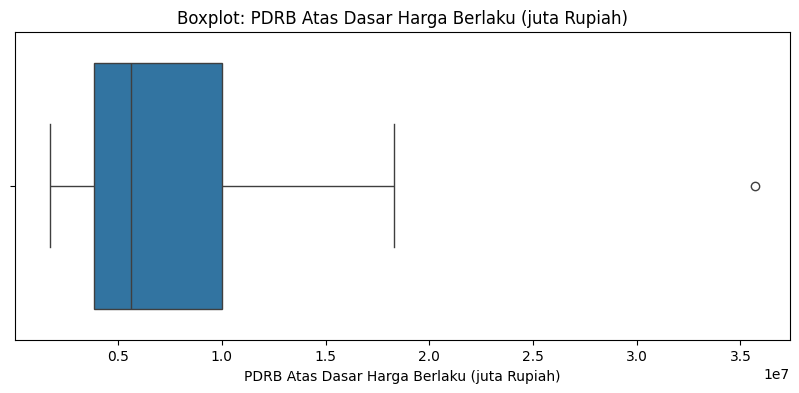

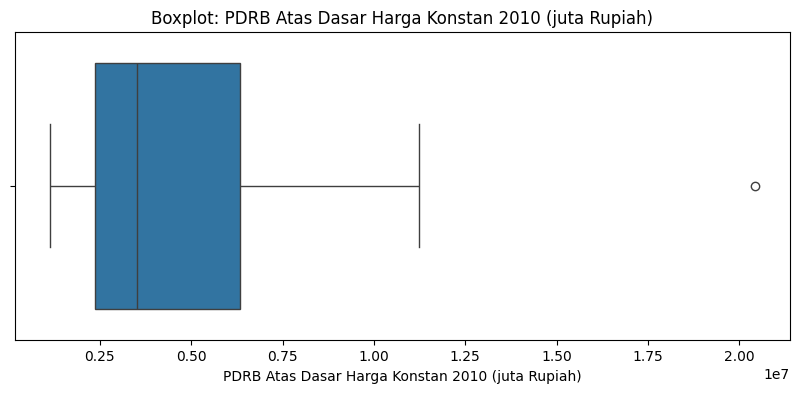

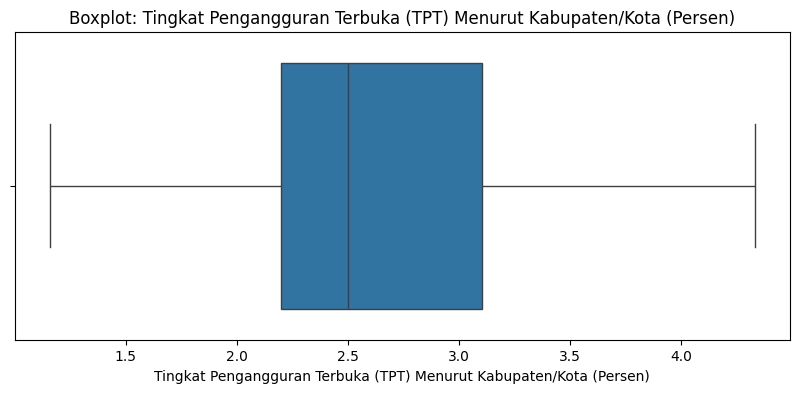

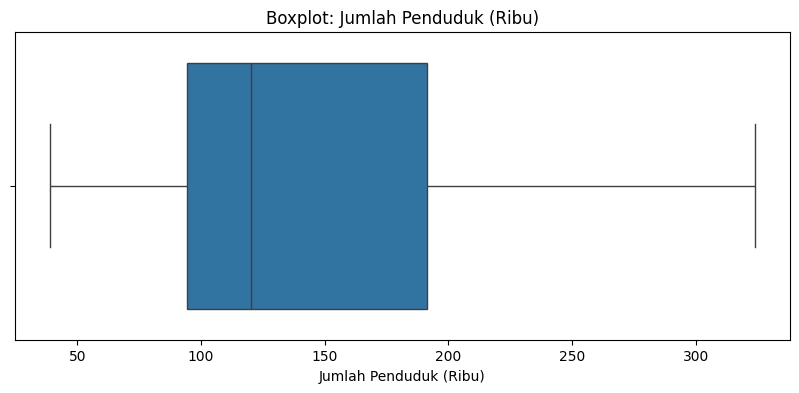

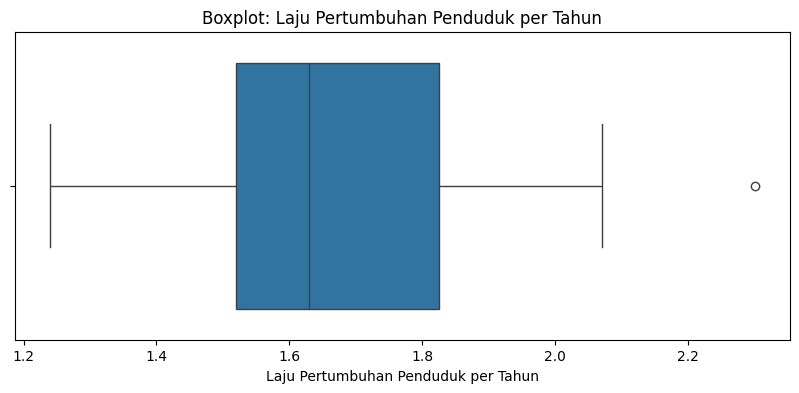

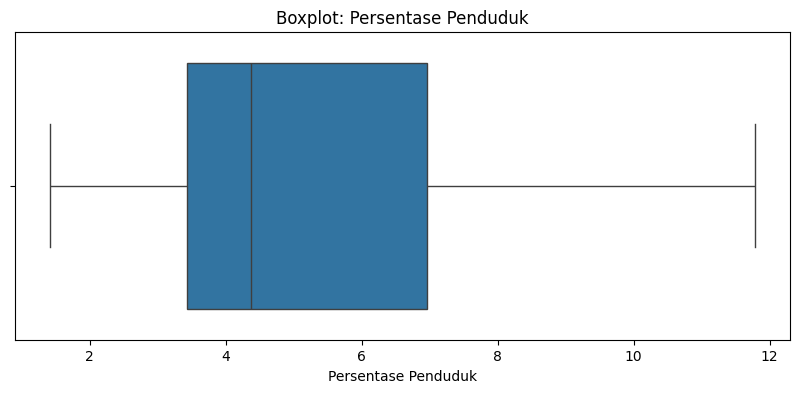

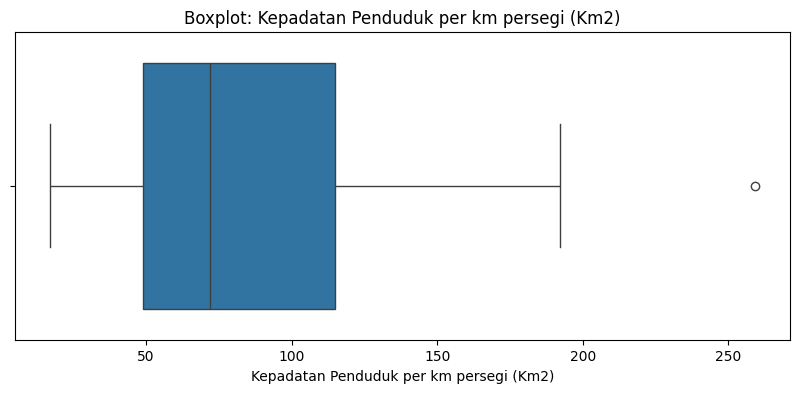

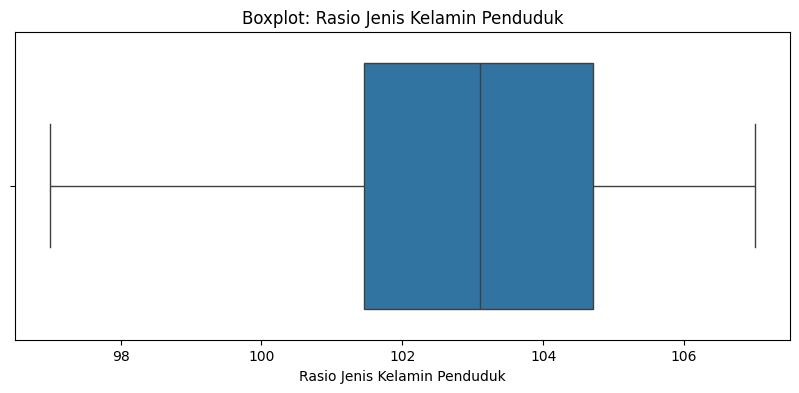

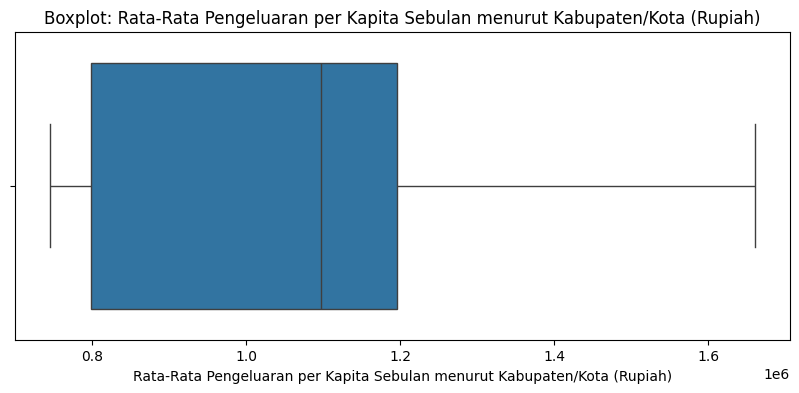

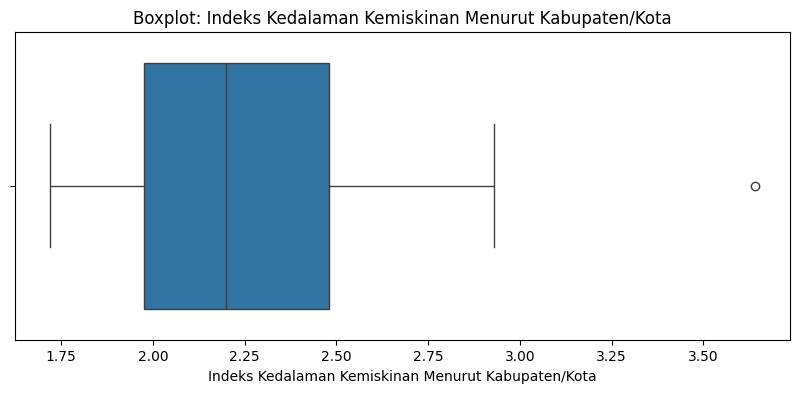

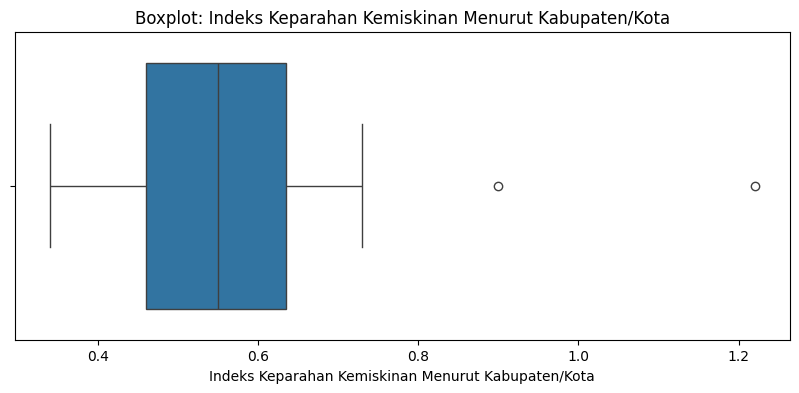

In [20]:
# **Visualisasi Boxplot untuk Setiap Variabel Numerik**

plt.figure(figsize=(12, 6))
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=combined_df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()


In [21]:
# **Deteksi Outlier Menggunakan Metode IQR**

outlier_summary = {}

for col in num_cols:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = combined_df[(combined_df[col] < lower_bound) | (combined_df[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

# Menampilkan jumlah outlier per variabel
print("\n=== Jumlah Outlier per Variabel Numerik ===")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outlier")



=== Jumlah Outlier per Variabel Numerik ===
Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen): 0 outlier
Rasio Elektrifikas: 1 outlier
Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen): 1 outlier
Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah): 0 outlier
Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa): 0 outlier
Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen): 2 outlier
Jumlah Sekolah (SMA) Kabupaten/Kota di SUlawesi Tenggara: 0 outlier
Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa): 1 outlier
Rata-rata Lama Sekolah (Tahun): 0 outlier
Indeks Pembangunan Manusia (IPM) Laki-laki: 0 outlier
Indeks Pembangunan Manusia (IPM) Perempuan: 0 outlier
PDRB Per Kapita  Atas Dasar Harga Konstan 2010 (Juta Rupiah): 1 outlier
PDRB Atas Dasar Harga Berlaku (juta Rupiah): 1 outlier
PDRB Atas 

In [22]:
# **Baris yang Mengandung Outlier pada Setiap Variabel**

outlier_rows = {}

for col in num_cols:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    rows = combined_df[(combined_df[col] < lower_bound) | (combined_df[col] > upper_bound)]
    if len(rows) > 0:
        outlier_rows[col] = rows[["Kabupaten/Kota", col]]

print("\n=== Detil Outlier Berdasarkan Kabupaten/Kota ===")
for col, rows in outlier_rows.items():
    print(f"\n--- {col} ---")
    display(rows)



=== Detil Outlier Berdasarkan Kabupaten/Kota ===

--- Rasio Elektrifikas ---


,Kabupaten/Kota,Rasio Elektrifikas
7,Kolaka Utara,98.67



--- Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen) ---


,Kabupaten/Kota,Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)
7,Kolaka Utara,76.75



--- Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen) ---


,Kabupaten/Kota,Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)
4,Konawe Selatan,11.26
5,Bombana,10.73



--- Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa) ---


,Kabupaten/Kota,Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa)
4,Konawe Selatan,9874



--- PDRB Per Kapita  Atas Dasar Harga Konstan 2010 (Juta Rupiah) ---


,Kabupaten/Kota,PDRB Per Kapita Atas Dasar Harga Konstan 2010 (Juta Rupiah)
3,Kolaka,83.03



--- PDRB Atas Dasar Harga Berlaku (juta Rupiah) ---


,Kabupaten/Kota,PDRB Atas Dasar Harga Berlaku (juta Rupiah)
3,Kolaka,35684210.97



--- PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah) ---


,Kabupaten/Kota,PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah)
3,Kolaka,20418779.35



--- Laju Pertumbuhan Penduduk per Tahun ---


,Kabupaten/Kota,Laju Pertumbuhan Penduduk per Tahun
9,Konawe Utara,2.3



--- Kepadatan Penduduk per km persegi (Km2) ---


,Kabupaten/Kota,Kepadatan Penduduk per km persegi (Km2)
6,Wakatobi,259



--- Indeks Kedalaman Kemiskinan Menurut Kabupaten/Kota ---


,Kabupaten/Kota,Indeks Kedalaman Kemiskinan Menurut Kabupaten/Kota
6,Wakatobi,3.64



--- Indeks Keparahan Kemiskinan Menurut Kabupaten/Kota ---


,Kabupaten/Kota,Indeks Keparahan Kemiskinan Menurut Kabupaten/Kota
6,Wakatobi,1.22
7,Kolaka Utara,0.90



 **Analisis Penanganan Outlier:**

 Berdasarkan hasil deteksi outlier di atas, ditemukan beberapa nilai ekstrem pada wilayah:

>   * **Kolaka:** Menunjukkan nilai PDRB yang sangat tinggi (ekstrem) karena merupakan wilayah pusat industri/pertambangan.
>   * **Wakatobi:** Menunjukkan kepadatan penduduk dan indeks kemiskinan yang tinggi karena karakteristik wilayah kepulauan kecil.
>   * **Konawe Selatan:** Menunjukkan tingkat kemiskinan terendah sebagai *best practice*.

 **Keputusan:** Data ini dikategorikan sebagai **Natural Outlier** (data valid yang mencerminkan kondisi lapangan yang sebenarnya), bukan *error* input. Oleh karena itu, **tidak dilakukan penghapusan data (*dropping*)**. Data ini justru akan dipertahankan untuk analisis kesenjangan antarwilayah.



# **Cleaning Data**


Pada tahap ini dilakukan beberapa proses:
Pada tahap cleaning ini dilakukan beberapa proses:
1. Menghapus baris agregat provinsi (Sulawesi Tenggara)
2. Menangani missing value (jika ada)
3. Rename kolom agar konsisten dan bebas spasi
4. Mengecek ulang struktur data setelah cleaning



In [23]:
# ==============================
# 1. Menghapus baris Provinsi
# ==============================

remove_list = ["SULAWESI TENGGARA", "PROVINSI SULAWESI TENGGARA"]

for df in [akses, kemiskinan, pendidikan, ekonomi, demografi, pengeluaran]:
    df.drop(df[df['Kabupaten/Kota'].isin(remove_list)].index, inplace=True)

print("✔ Baris provinsi dihapus di semua dataset.")


✔ Baris provinsi dihapus di semua dataset.


In [24]:
# ==============================
# 2. Mengisi Missing Value (Jika Ada)
# ==============================

datasets = {
    "akses": akses,
    "kemiskinan": kemiskinan,
    "pendidikan": pendidikan,
    "ekonomi": ekonomi,
    "demografi": demografi,
    "pengeluaran": pengeluaran
}

for name, df in datasets.items():
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)

print("✔ Missing value ditangani.")

✔ Missing value ditangani.


In [25]:
# ==============================
# 3. Rename Kolom Agar Konsisten
# ==============================

# Perbaikan Nama Kabupaten/Kota pada dataset demografi
demografi["Kabupaten/Kota"] = demografi["Kabupaten/Kota"].replace({
    "Kota Kendari": "Kendari",
    "Kota Baubau": "Baubau"
})
# RENAME DICTIONARY — EXACT MATCH 100%
rename_dict = {

    # --- Akses Pelayanan Publik ---
    "Persentase Rumah Tangga yang Memiliki Akses Terhadap Sanitasi Layak Menurut Kabupaten/Kota di Provinsi Sulawesi Tenggara (Persen)": "akses_sanitasi_pct",
    "Rasio Elektrifikas": "rasio_listrik_pct",
    "Persentase Penduduk Berumur 5 Tahun ke Atas yang Pernah Mengakses Internet dalam 3 Bulan Terakhir Menurut Kabupaten/Kota (Persen)": "akses_internet_pct",

    # --- Kemiskinan ---
    "Garis Kemiskinan Menurut Kabupaten/Kota (Ribu Rupiah)": "garis_kemiskinan_rp",
    "Jumlah Penduduk Miskin Menurut Kabupaten/Kota (Ribu Jiwa)": "penduduk_miskin_jiwa",
    "Persentase Penduduk Miskin Menurut Kabupaten/Kota (Persen)": "persen_miskin_pct",

    # --- Pendidikan ---
    "Jumlah Sekolah (SMA) Kabupaten/Kota di SUlawesi Tenggara": "sekolah_sma",
    "Jumlah Murid SMA (di Bawah Kementerian Pendidikan dan Kebudayaan) (Jiwa)": "murid_sma_jiwa",
    "Rata-rata Lama Sekolah (Tahun)": "lama_sekolah_th",
    "Indeks Pembangunan Manusia (IPM) Laki-laki": "ipm_l",
    "Indeks Pembangunan Manusia (IPM) Perempuan": "ipm_p",

    # --- Ekonomi ---
    "PDRB Per Kapita  Atas Dasar Harga Konstan 2010 (Juta Rupiah)": "pdrb_perkapita_jt",
    "PDRB Atas Dasar Harga Berlaku (juta Rupiah)": "pdrb_adhb_jt",
    "PDRB Atas Dasar Harga Konstan 2010 (juta Rupiah)": "pdrb_adhk_jt",
    "Tingkat Pengangguran Terbuka (TPT) Menurut Kabupaten/Kota (Persen)": "tpt_pct",

    # --- Demografi ---
    "Jumlah Penduduk (Ribu)": "penduduk_jiwa",
    "Laju Pertumbuhan Penduduk per Tahun": "pertumbuhan_pct",
    "Persentase Penduduk": "persen_penduduk_pct",
    "Kepadatan Penduduk per km persegi (Km2)": "kepadatan_km2",
    "Rasio Jenis Kelamin Penduduk": "rasio_jk",

    # --- Pengeluaran / Ketimpangan ---
    "Rata-Rata Pengeluaran per Kapita Sebulan menurut Kabupaten/Kota (Rupiah)": "pengeluaran_rp",
    "Indeks Kedalaman Kemiskinan Menurut Kabupaten/Kota": "kedalaman_miskin",
    "Indeks Keparahan Kemiskinan Menurut Kabupaten/Kota": "keparahan_miskin"
}

# Terapkan rename ke masing-masing dataframe
for df in [akses, kemiskinan, pendidikan, ekonomi, demografi, pengeluaran]:
    df.rename(columns=rename_dict, inplace=True)

print("✔ Semua kolom berhasil dipersingkat dan unit tetap terjaga.")


✔ Semua kolom berhasil dipersingkat dan unit tetap terjaga.


In [26]:
print("\n=== Contoh Data Setelah Cleaning ===")
display(akses.head())
print("\n=== Contoh Data Setelah Cleaning ===")
display(pendidikan.head())

display(pengeluaran.head())
display(kemiskinan.head())


=== Contoh Data Setelah Cleaning ===


,Kabupaten/Kota,akses_sanitasi_pct,rasio_listrik_pct,akses_internet_pct
0,Buton,80.33,99.59,55.14
1,Muna,85.31,99.07,54.47
2,Konawe,90.50,99.65,62.38
3,Kolaka,93.56,99.93,66.79
4,Konawe Selatan,92.36,99.90,63.95



=== Contoh Data Setelah Cleaning ===


,Kabupaten/Kota,sekolah_sma,murid_sma_jiwa,lama_sekolah_th,ipm_l,ipm_p
0,Buton,23,5524,8.49,75.99,62.22
1,Muna,35,9402,8.53,75.98,66.84
2,Konawe,28,8891,9.56,77.80,72.85
3,Kolaka,15,6046,9.35,79.57,71.93
4,Konawe Selatan,29,9874,8.51,74.86,66.30


,Kabupaten/Kota,pengeluaran_rp,kedalaman_miskin,keparahan_miskin
0,Buton,793172,1.93,0.37
1,Muna,786420,2.21,0.50
2,Konawe,1264259,2.35,0.60
3,Kolaka,1245515,1.95,0.50
4,Konawe Selatan,1096657,2.20,0.55


,Kabupaten/Kota,garis_kemiskinan_rp,penduduk_miskin_jiwa,persen_miskin_pct
0,Buton,302183,14.15,13.77
1,Muna,419071,32.24,14.07
2,Konawe,400581,33.09,13.02
3,Kolaka,464000,32.96,11.80
4,Konawe Selatan,331620,36.84,11.26


## **Merge Dataset Menjadi Master DataFrame**

Tahap ini menggabungkan seluruh dataset berdasarkan kolom 'Kabupaten/Kota'.
Urutan merge disusun agar lebih mudah ditelusuri.


In [27]:
master_df = akses.merge(kemiskinan, on="Kabupaten/Kota") \
                 .merge(pendidikan, on="Kabupaten/Kota") \
                 .merge(ekonomi, on="Kabupaten/Kota") \
                 .merge(demografi, on="Kabupaten/Kota") \
                 .merge(pengeluaran, on="Kabupaten/Kota")

print("✔ Merge dataset selesai.")
print("Shape master_df:", master_df.shape)

✔ Merge dataset selesai.
Shape master_df: (17, 24)


In [28]:
# Tampilkan 5 baris awal
display(master_df.head())

,Kabupaten/Kota,akses_sanitasi_pct,rasio_listrik_pct,akses_internet_pct,garis_kemiskinan_rp,penduduk_miskin_jiwa,persen_miskin_pct,sekolah_sma,murid_sma_jiwa,lama_sekolah_th,...,pdrb_adhk_jt,tpt_pct,penduduk_jiwa,pertumbuhan_pct,persen_penduduk_pct,kepadatan_km2,rasio_jk,pengeluaran_rp,kedalaman_miskin,keparahan_miskin
0,Buton,80.33,99.59,55.14,302183,14.15,13.77,23,5524,8.49,...,3101735.07,2.48,120.2,1.56,4.37,72,102.1,793172,1.93,0.37
1,Muna,85.31,99.07,54.47,419071,32.24,14.07,35,9402,8.53,...,5650868.84,3.27,224.7,1.53,8.17,121,97.0,786420,2.21,0.50
2,Konawe,90.50,99.65,62.38,400581,33.09,13.02,28,8891,9.56,...,11244655.64,3.09,269.5,1.74,9.80,50,107.0,1264259,2.35,0.60
3,Kolaka,93.56,99.93,66.79,464000,32.96,11.80,15,6046,9.35,...,20418779.35,3.36,245.9,1.26,8.95,83,104.3,1245515,1.95,0.50
4,Konawe Selatan,92.36,99.90,63.95,331620,36.84,11.26,29,9874,8.51,...,9630029.61,3.12,323.8,1.77,11.78,76,105.0,1096657,2.20,0.55


# **Cek Missing Value Setelah Merge**



In [29]:
print("\n=== Missing Value per Kolom Setelah Merge ===")
missing = master_df.isnull().sum()
display(missing)



=== Missing Value per Kolom Setelah Merge ===


,0
Kabupaten/Kota,0
akses_sanitasi_pct,0
rasio_listrik_pct,0
akses_internet_pct,0
garis_kemiskinan_rp,0
penduduk_miskin_jiwa,0
persen_miskin_pct,0
sekolah_sma,0
murid_sma_jiwa,0
lama_sekolah_th,0


## **Cek Duplikasi Data**


In [30]:
duplicates = master_df.duplicated().sum()
print(f"Jumlah duplikasi baris: {duplicates}")

if duplicates > 0:
    master_df = master_df.drop_duplicates()
    print("✔ Duplikasi baris sudah dihapus.")
else:
    print("✔ Tidak ada duplikasi.")

Jumlah duplikasi baris: 0
✔ Tidak ada duplikasi.


## **Cek Tipe Data Setiap Kolom**

In [31]:


print("\n=== Info Master Dataset Setelah Cleaning ===")
master_df.info()



=== Info Master Dataset Setelah Cleaning ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kabupaten/Kota        17 non-null     object 
 1   akses_sanitasi_pct    17 non-null     float64
 2   rasio_listrik_pct     17 non-null     float64
 3   akses_internet_pct    17 non-null     float64
 4   garis_kemiskinan_rp   17 non-null     int64  
 5   penduduk_miskin_jiwa  17 non-null     float64
 6   persen_miskin_pct     17 non-null     float64
 7   sekolah_sma           17 non-null     int64  
 8   murid_sma_jiwa        17 non-null     int64  
 9   lama_sekolah_th       17 non-null     float64
 10  ipm_l                 17 non-null     float64
 11  ipm_p                 17 non-null     float64
 12  pdrb_perkapita_jt     17 non-null     float64
 13  pdrb_adhb_jt          17 non-null     float64
 14  pdrb_adhk_jt          17 non-n

## **Statistik Deskriptif Master Dataset**

In [32]:
print("\n=== Statistik Deskriptif ===")
display(master_df.describe().T)


=== Statistik Deskriptif ===


,count,mean,std,min,25%,50%,75%,max
akses_sanitasi_pct,17.0,8.584059e+01,7.957126e+00,71.64,82.74,85.49,92.89,96.99
rasio_listrik_pct,17.0,9.966706e+01,3.817847e-01,98.67,99.57,99.74,99.99,100.00
akses_internet_pct,17.0,6.290176e+01,9.528293e+00,51.73,55.14,62.25,66.79,85.61
garis_kemiskinan_rp,17.0,3.994596e+05,7.174334e+04,290203.00,340151.00,403834.00,419071.00,517092.00
penduduk_miskin_jiwa,17.0,1.891588e+01,9.595982e+00,5.44,11.88,15.35,21.79,36.84
persen_miskin_pct,17.0,1.275588e+01,2.910161e+00,4.59,11.80,13.77,14.07,15.90
sekolah_sma,17.0,1.841176e+01,8.411739e+00,6.00,12.00,16.00,26.00,35.00
murid_sma_jiwa,17.0,5.541294e+03,2.910409e+03,1518.00,3315.00,4569.00,6046.00,12115.00
lama_sekolah_th,17.0,8.988235e+00,1.266191e+00,7.34,8.40,8.53,9.45,12.53
ipm_l,17.0,7.572471e+01,4.417055e+00,69.86,72.77,74.86,76.48,87.64


# **Exploratory Data Analysis (EDA)**

### 1. **MENAMPILKAN DISTRIBUSI SETIAP VARIABEL UTAMA**

Tujuan: melihat pola dasar, apakah data miring (skewed), normal, atau ada outlier alami.

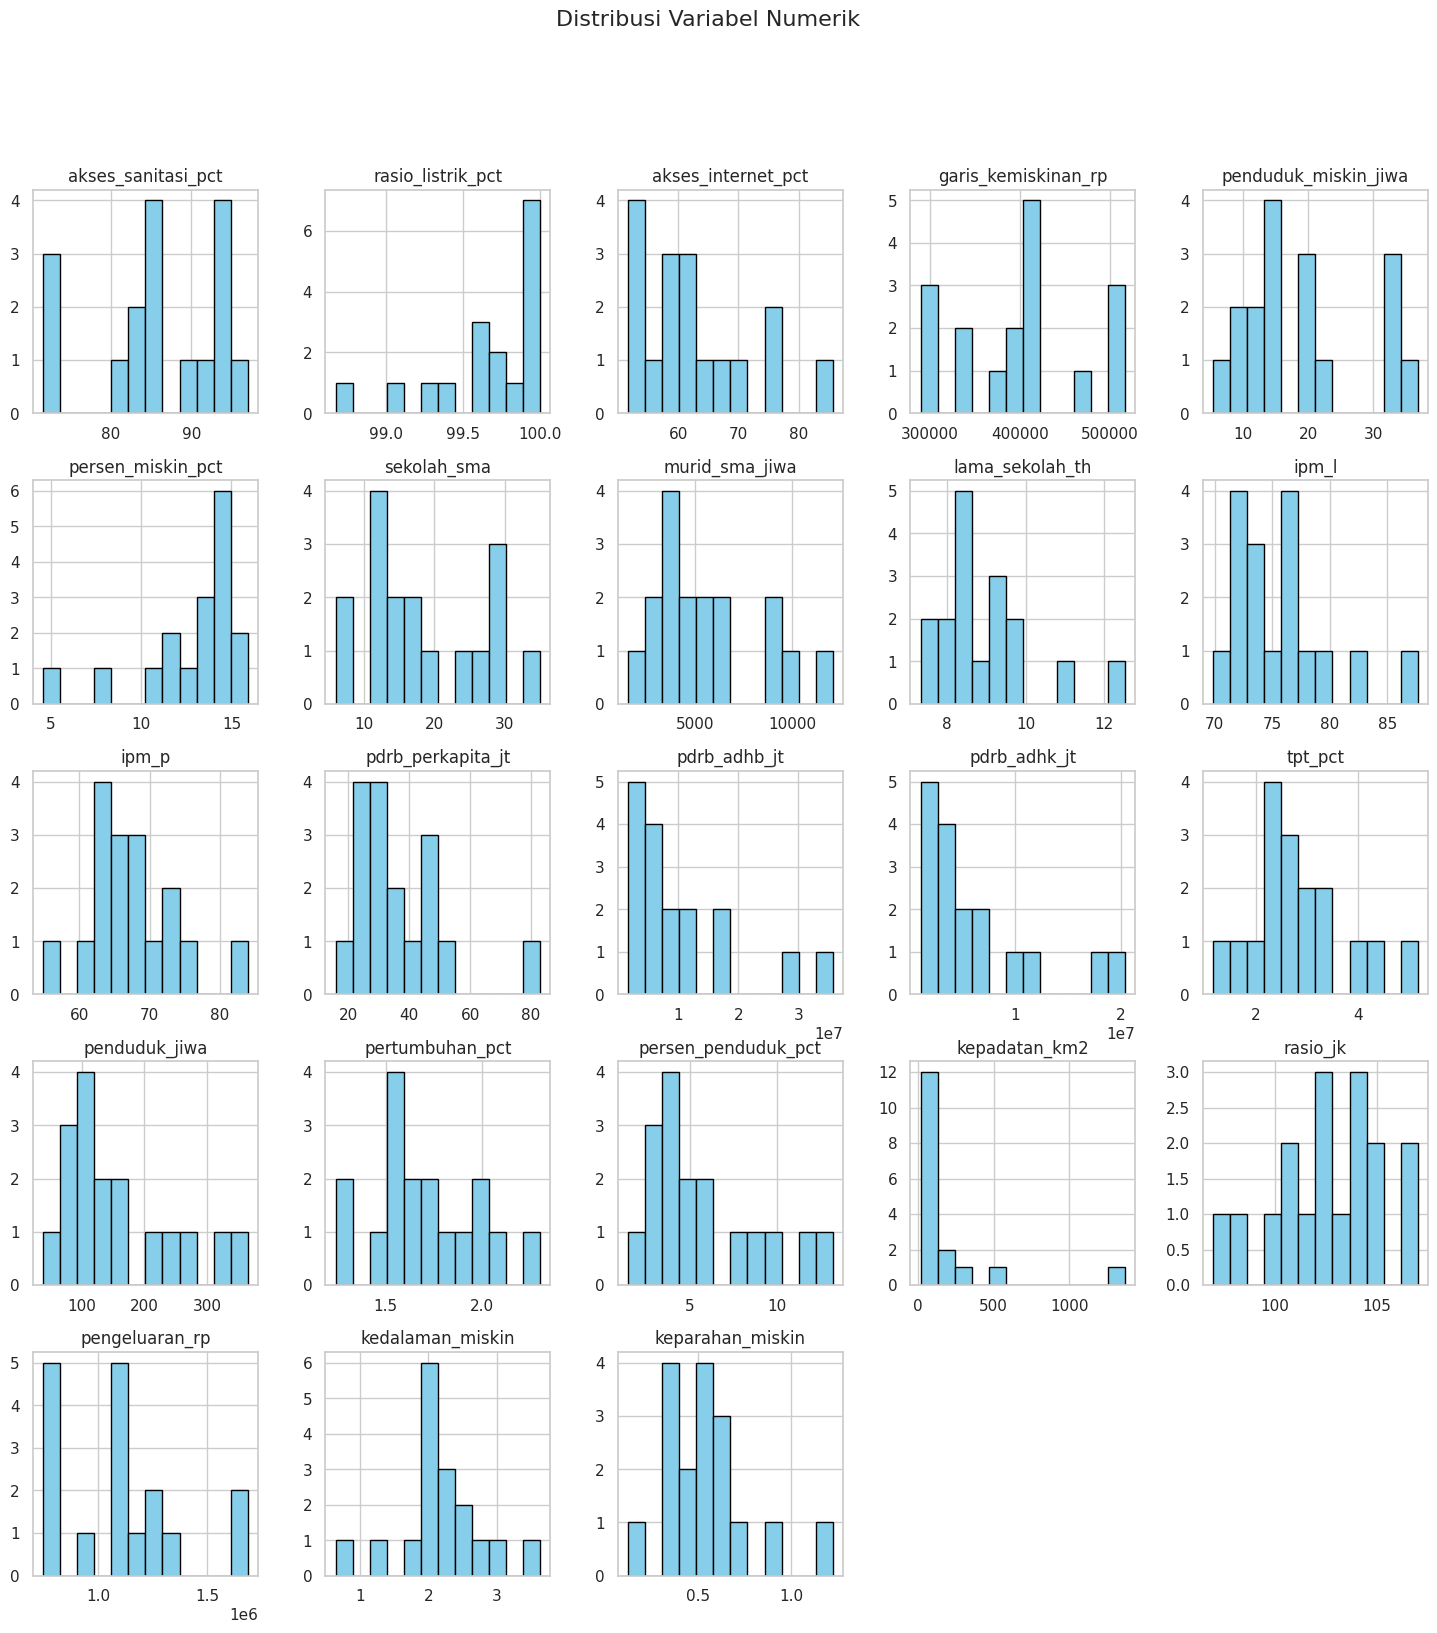

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot distribusi seluruh variabel numerik
master_df.hist(bins=12, figsize=(18, 18), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.show()


### **2. HEATMAP KORELASI ANTAR VARIABEL**

Tujuan: melihat variabel apa yang paling berkaitan dengan ketimpangan, kemiskinan, IPM, ekonomi → sangat relevan untuk SDGs 10.

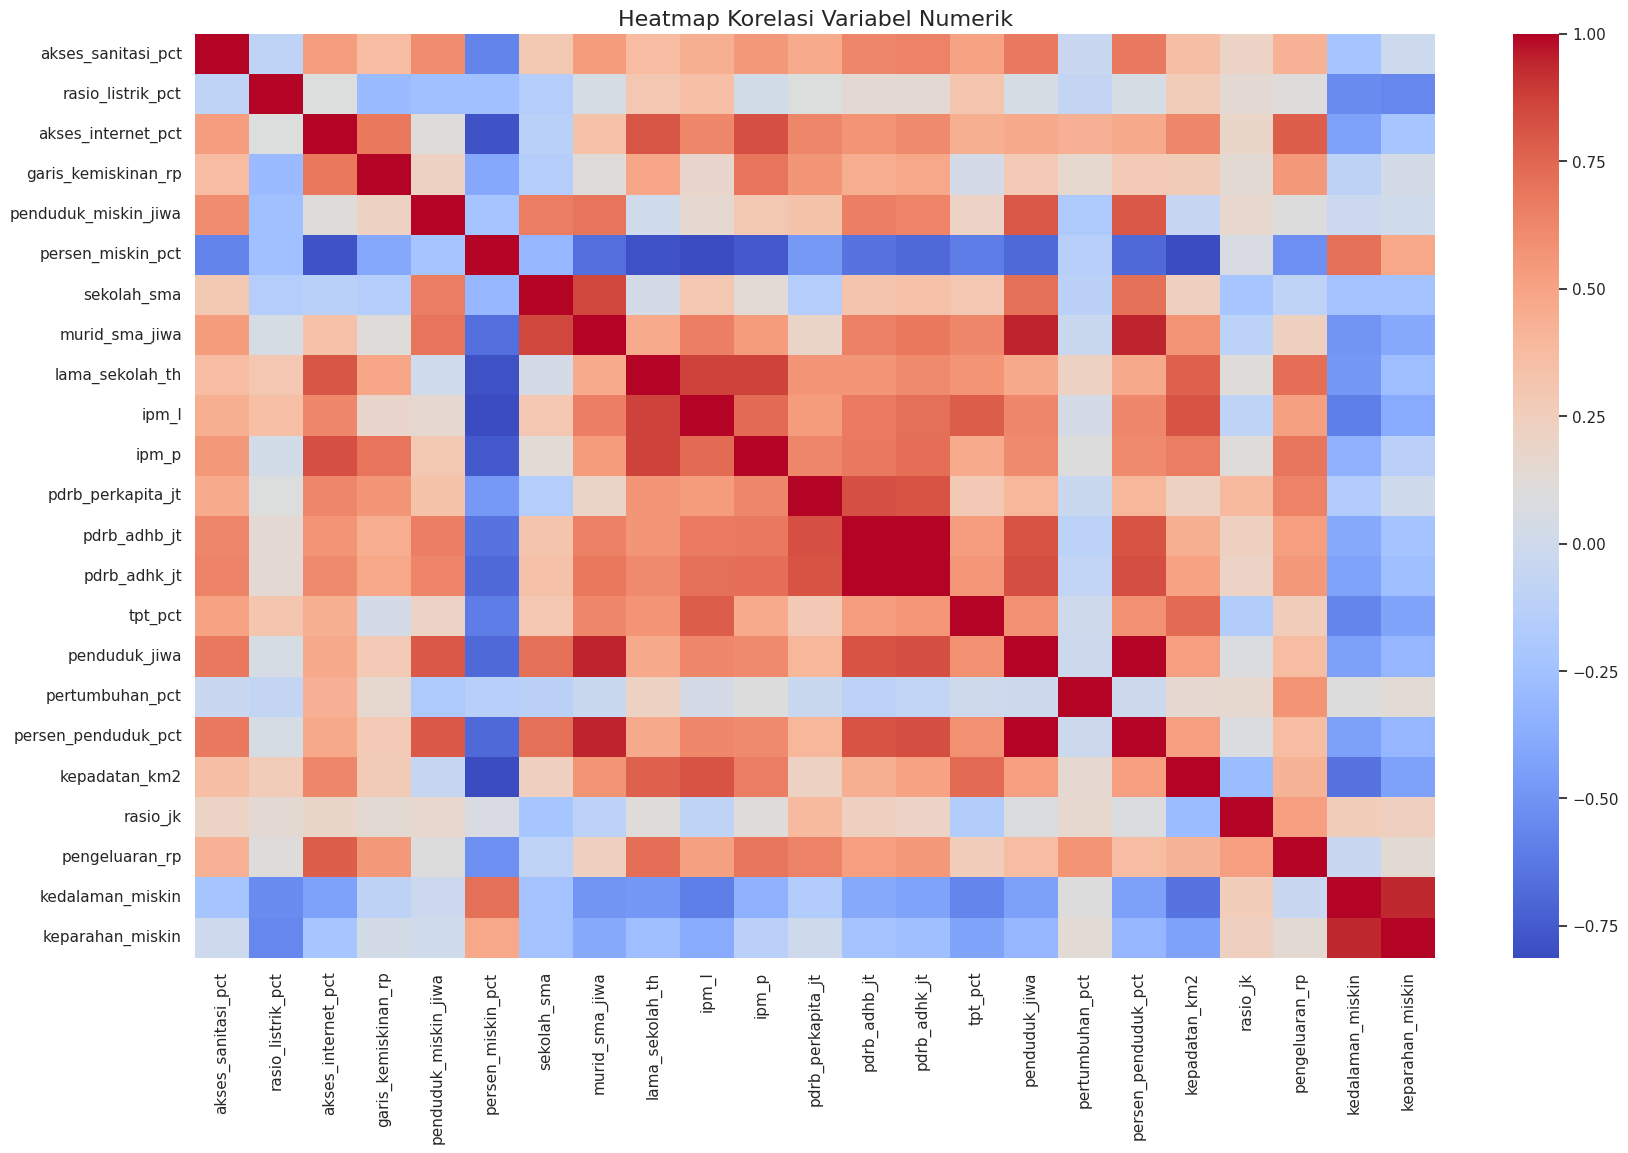

In [40]:
plt.figure(figsize=(20, 12))
corr = master_df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Heatmap Korelasi Variabel Numerik", fontsize=16)
plt.show()


### **3. TOP 10 KABUPATEN/KOTA DENGAN KEMISKINAN TERTINGGI**

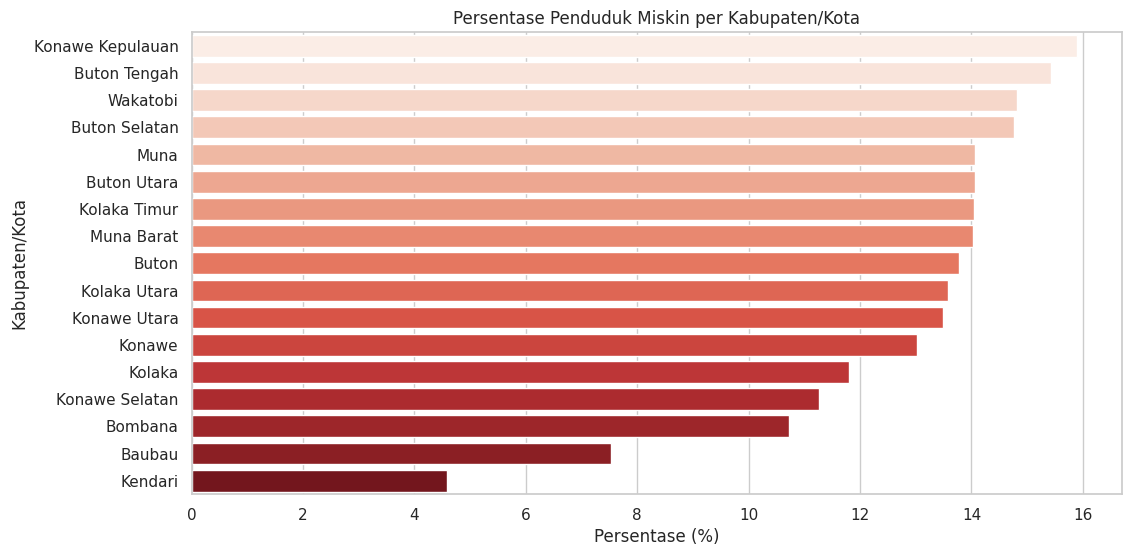

In [44]:
plt.figure(figsize=(12,6))
top_kemiskinan = master_df.sort_values("persen_miskin_pct", ascending=False)

sns.barplot(
    data=top_kemiskinan,
    x="persen_miskin_pct",
    y="Kabupaten/Kota",
    palette="Reds"
)

plt.title("Persentase Penduduk Miskin per Kabupaten/Kota")
plt.xlabel("Persentase (%)")
plt.ylabel("Kabupaten/Kota")
plt.show()


### **4. RELASI: IPM VS KEMISKINAN**

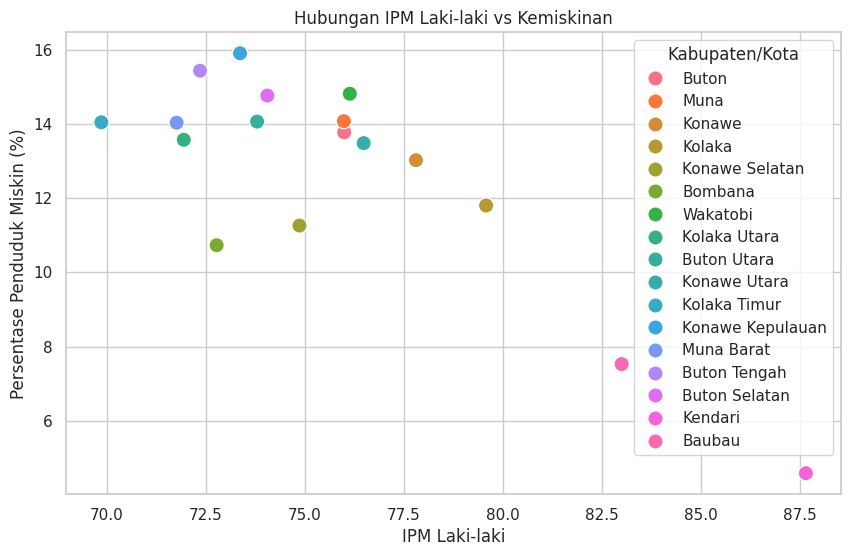

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=master_df,
    x="ipm_l",
    y="persen_miskin_pct",
    hue="Kabupaten/Kota",
    s=120
)
plt.title("Hubungan IPM Laki-laki vs Kemiskinan")
plt.xlabel("IPM Laki-laki")
plt.ylabel("Persentase Penduduk Miskin (%)")
plt.show()


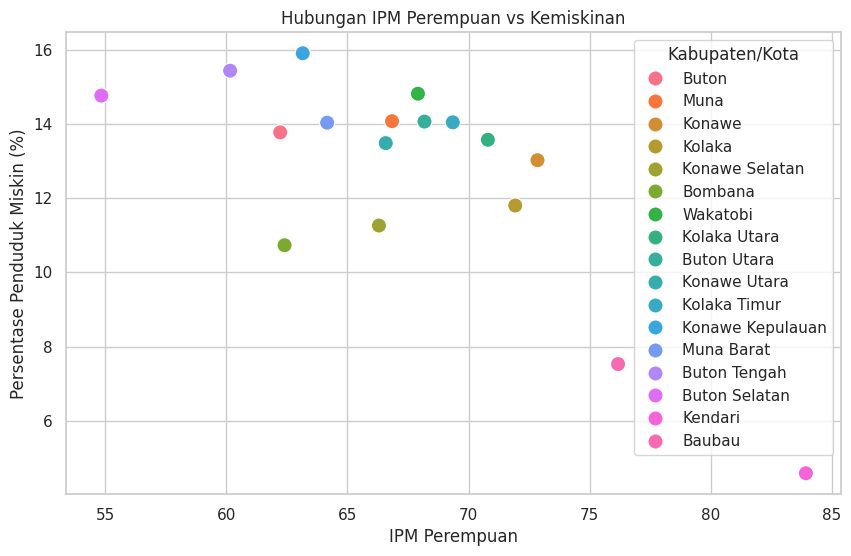

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=master_df,
    x="ipm_p",
    y="persen_miskin_pct",
    hue="Kabupaten/Kota",
    s=120
)
plt.title("Hubungan IPM Perempuan vs Kemiskinan")
plt.xlabel("IPM Perempuan")
plt.ylabel("Persentase Penduduk Miskin (%)")
plt.show()


### **5. RELASI: PDRB PER KAPITA VS KEMISKINAN**

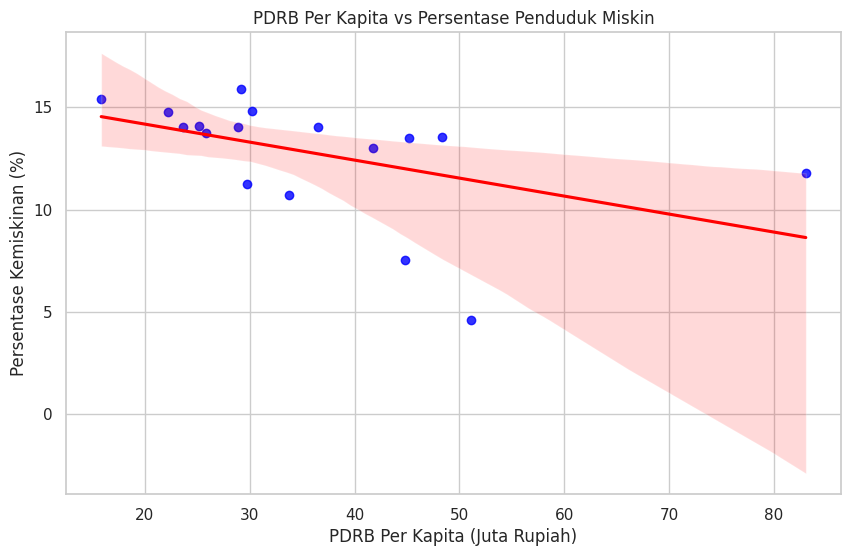

In [47]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=master_df,
    x="pdrb_perkapita_jt",
    y="persen_miskin_pct",
    scatter_kws={"color":"blue"},
    line_kws={"color":"red"}
)

plt.title("PDRB Per Kapita vs Persentase Penduduk Miskin")
plt.xlabel("PDRB Per Kapita (Juta Rupiah)")
plt.ylabel("Persentase Kemiskinan (%)")
plt.show()


### **6. RELASI: AKSES SANITASI VS KEMISKINAN**

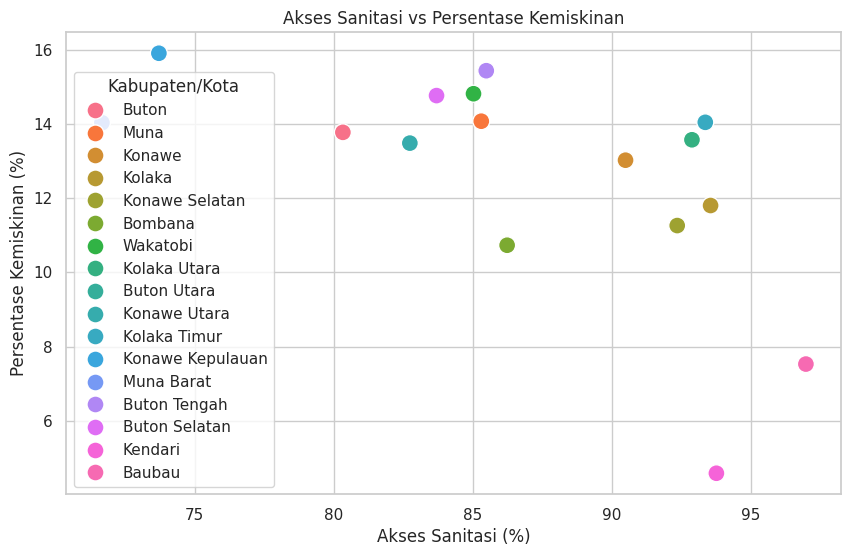

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=master_df,
    x="akses_sanitasi_pct",
    y="persen_miskin_pct",
    hue="Kabupaten/Kota",
    s=150
)

plt.title("Akses Sanitasi vs Persentase Kemiskinan")
plt.xlabel("Akses Sanitasi (%)")
plt.ylabel("Persentase Kemiskinan (%)")
plt.show()


### **7. RANKING KETIMPANGAN: KEDALAMAN & KEPARAHAN KEMISKINAN**

**Indeks Kedalaman Kemiskinan**

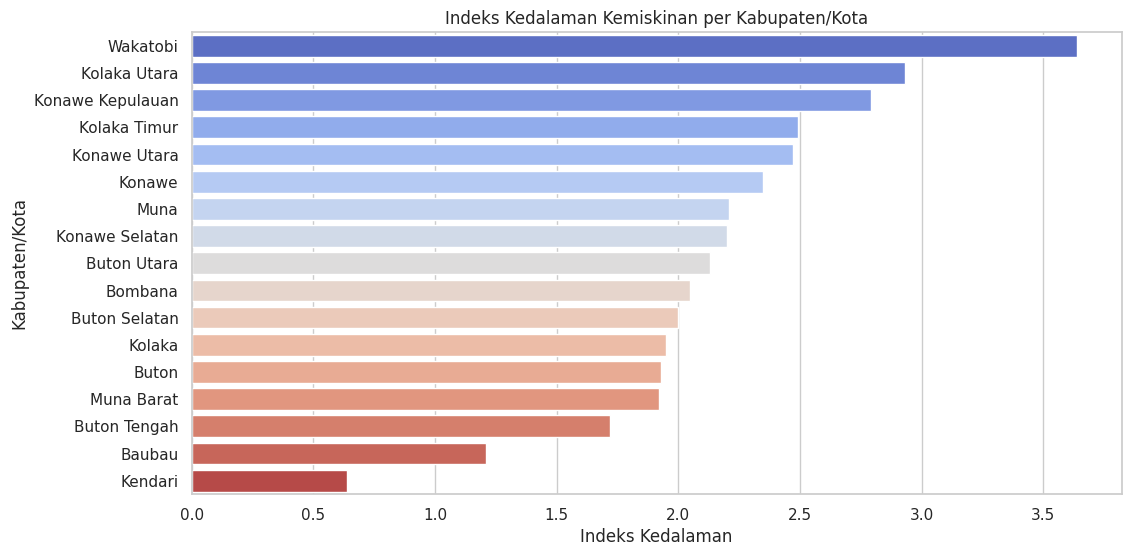

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=master_df.sort_values("kedalaman_miskin", ascending=False),
    x="kedalaman_miskin",
    y="Kabupaten/Kota",
    palette="coolwarm"
)
plt.title("Indeks Kedalaman Kemiskinan per Kabupaten/Kota")
plt.xlabel("Indeks Kedalaman")
plt.ylabel("Kabupaten/Kota")
plt.show()


**Indeks Keparahan Kemiskinan**

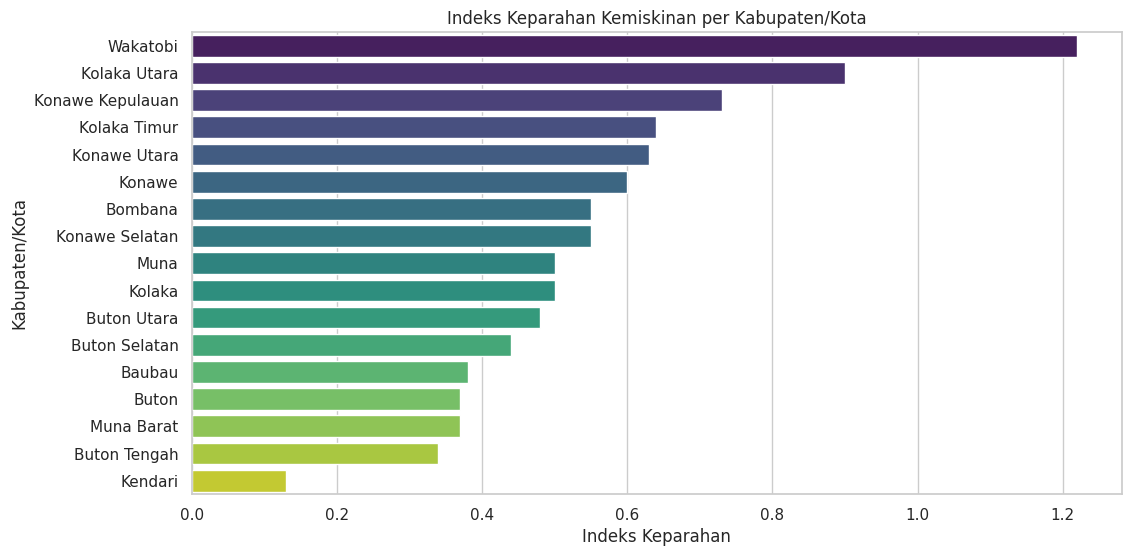

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=master_df.sort_values("keparahan_miskin", ascending=False),
    x="keparahan_miskin",
    y="Kabupaten/Kota",
    palette="viridis"
)
plt.title("Indeks Keparahan Kemiskinan per Kabupaten/Kota")
plt.xlabel("Indeks Keparahan")
plt.ylabel("Kabupaten/Kota")
plt.show()


### **8. PAIRPLOT**

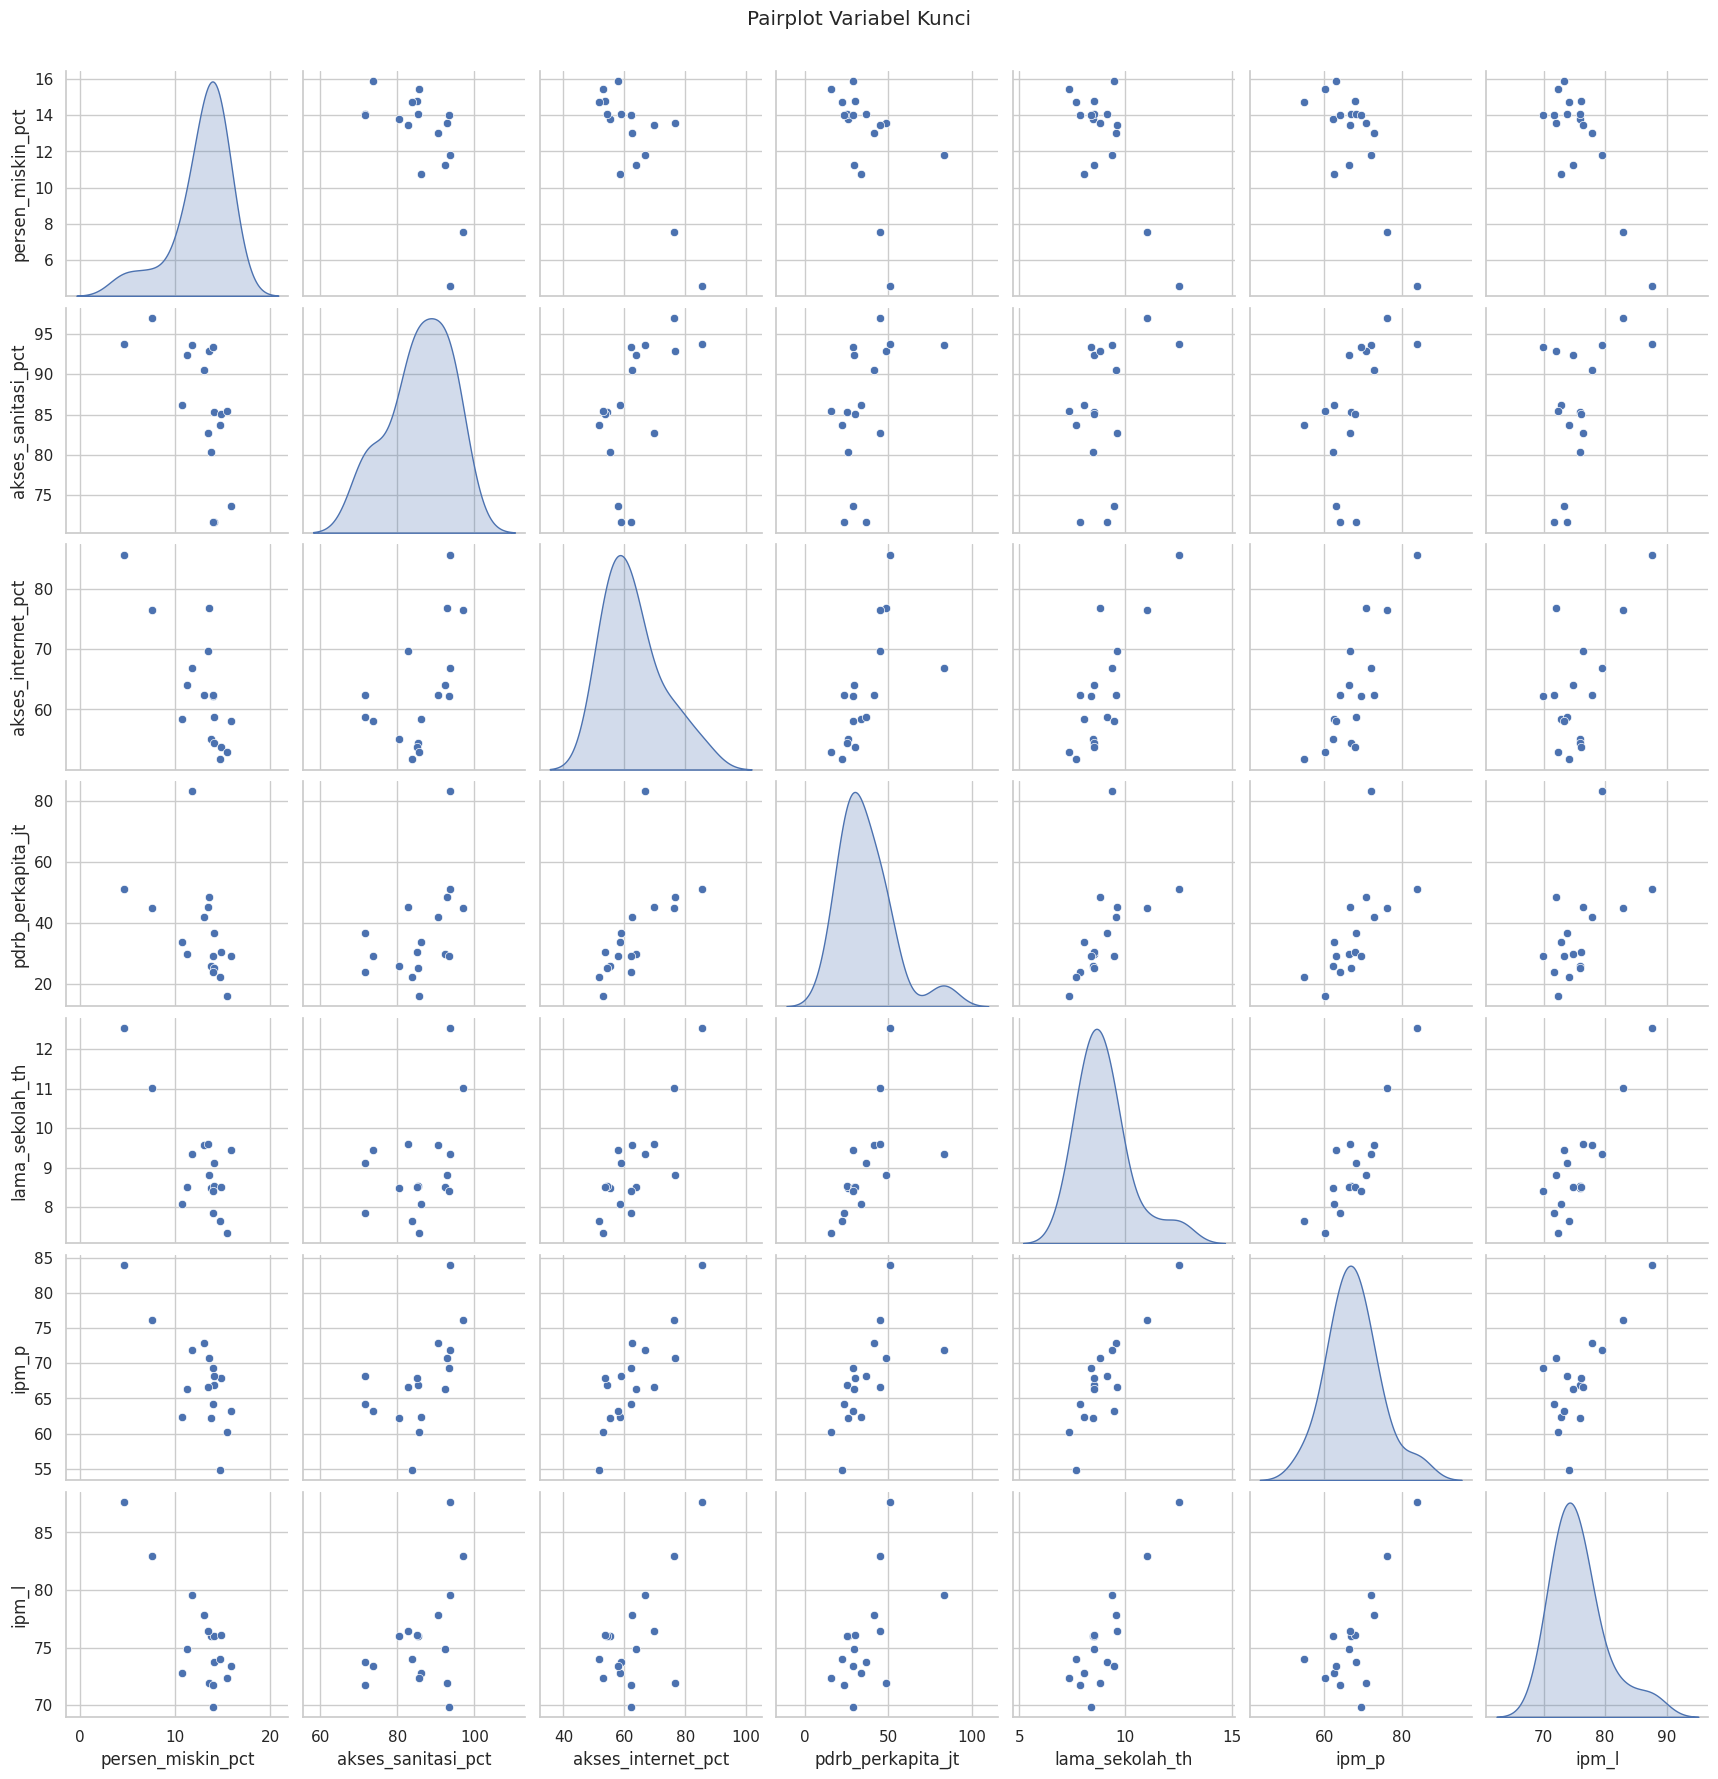

In [51]:
selected_cols = [
    "persen_miskin_pct",
    "akses_sanitasi_pct",
    "akses_internet_pct",
    "pdrb_perkapita_jt",
    "lama_sekolah_th",
    "ipm_p",
    "ipm_l"
]

sns.pairplot(master_df[selected_cols], diag_kind="kde")
plt.suptitle("Pairplot Variabel Kunci", y=1.02)
plt.show()
